# Mapping through time

In [1]:
import geopandas as gpd
import pandas as pd
#from shapely import wkt

import branca
import folium

## Load all data

In [7]:
## Lire les chefs lieux et les terrains pour l'habillage
path_to_geojsonfiles = "C:/Travail/Enseignement/Cours_M2_python/2023/data/INSEE/"

#Lire les chefs lieux 
cheflieux_url = (
    path_to_geojsonfiles+"chef-lieux_carto75_2022_2154.geojson"
)

cheflieux = gpd.read_file(cheflieux_url) #, where="INSEE_DEP='79'"
cheflieux.crs #2154
cheflieux = cheflieux.to_crs("EPSG:4326")
cheflieux.head()

#Lire les terrains
terrains = gpd.read_file(path_to_geojsonfiles+"terrains_imhana_2154.geojson")
type(terrains) #geopandas.geodataframe.GeoDataFrame
terrains.crs
terrains = terrains.to_crs("EPSG:4326")
terrains.head()

,zone_etude,geometry
0,01_Bressuire,"POLYGON ((-0.61500 46.62289, -0.61556 46.62314..."
1,02_Mille-Vaches,"MULTIPOLYGON (((1.78999 45.44785, 1.78891 45.4..."
2,03_Périgord-Vert,"POLYGON ((0.74926 45.44991, 0.74812 45.44940, ..."
3,04_Pays-Foyen,"POLYGON ((0.05245 44.71769, 0.05237 44.71703, ..."


In [8]:
communes_URL = path_to_geojsonfiles+'communes_NA2022_4326.geojson'
zones = gpd.read_file(communes_URL)
print(zones.shape) #(4309, 6)



# Supprimer la colonne id, l'index sauvegardé dans le fichier, mais inutile. 
zones.drop(['id'], axis=1, inplace=True)
print(zones.shape) #(4309, 5)


dtype_dict = {'insee_com':'string', 'nom':'string', 'nomepci':'string'} #Il fallait convertir nomepci en string pour faire la jointure avec data
zones = zones.astype(dtype = dtype_dict)
#zones.set_index('insee_com', inplace=True)

zones.head()


(4309, 6)
(4309, 5)


,insee_com,nom,nomepci,surface_km2,geometry
0,19133,Mercœur,CC Xaintrie Val'Dordogne,30.103913,"MULTIPOLYGON (((1.92649 44.97784, 1.92613 44.9..."
1,33155,Escaudes,CC du Bazadais,25.719571,"MULTIPOLYGON (((-0.21366 44.34660, -0.21338 44..."
2,33551,Villeneuve,CC de Blaye,3.314709,"MULTIPOLYGON (((-0.63817 45.07800, -0.64130 45..."
3,19143,Montaignac-sur-Doustre,CC de Ventadour - Egletons - Monédières,32.619316,"MULTIPOLYGON (((2.03553 45.36422, 2.03565 45.3..."
4,19144,Montgibaud,CC du Pays de Lubersac-Pompadour,14.106325,"MULTIPOLYGON (((1.39144 45.50739, 1.39145 45.5..."


In [9]:
communes_ts = pd.read_csv(path_to_geojsonfiles+'communes_ts_etrangerscommunes.csv')
print(communes_ts.shape)
dtype_dict = {'code':'string'} #,  'annee_dt':'timestamps'
communes_ts = communes_ts.astype(dtype = dtype_dict)
communes_ts.head() #7 colonnes

(60326, 7)


,code,level,annee,petranger,annee_dt,color,opacity
0,40014,commune,1926,3.921569,-1388534400,#fee08bff,1
1,40015,commune,1926,0.319489,-1388534400,#4a1486ff,1
2,40016,commune,1926,0.000000,-1388534400,#4a1486ff,1
3,40017,commune,1926,0.000000,-1388534400,#4a1486ff,1
4,40018,commune,1926,0.000000,-1388534400,#4a1486ff,1


In [10]:
import json
styledict_communes_path = path_to_geojsonfiles+'styledict_communes.json'
output = open(styledict_communes_path, "r")
styledict_communes = json.load(output)
styledict_communes

{'40014': {'-1388534400': {'color': '#fee08bff', 'opacity': 1},
  '-1073001600': {'color': '#fee08bff', 'opacity': 1},
  '-757382400': {'color': '#fee08bff', 'opacity': 1},
  '-252460800': {'color': '#fee08bff', 'opacity': 1},
  '-63158400': {'color': '#1d91c0ff', 'opacity': 1},
  '157766400': {'color': '#7fcdbbff', 'opacity': 1},
  '378691200': {'color': '#7fcdbbff', 'opacity': 1},
  '631152000': {'color': '#7fcdbbff', 'opacity': 1},
  '915148800': {'color': '#7fcdbbff', 'opacity': 1},
  '1199145600': {'color': '#1d91c0ff', 'opacity': 1},
  '1356998400': {'color': '#1d91c0ff', 'opacity': 1},
  '1514764800': {'color': '#7fcdbbff', 'opacity': 1},
  '1577836800': {'color': '#7fcdbbff', 'opacity': 1},
  '1640995200': {'color': '#7fcdbbff', 'opacity': 1}},
 '40015': {'-1388534400': {'color': '#4a1486ff', 'opacity': 1},
  '-1073001600': {'color': '#4a1486ff', 'opacity': 1},
  '-757382400': {'color': '#4a1486ff', 'opacity': 1},
  '-252460800': {'color': '#4a1486ff', 'opacity': 1},
  '-631584

## Do the map

In [11]:
communes_ts.set_index('code', inplace=True) #60326 rows × 7 columns

In [12]:
test = zones.join(communes_ts,   how='left', on="insee_com") #Jointure sur la column insee_com	 de zones qui égale l'index de communes_ts (code)
print(test.shape)

test #60326 rows × 11 columns

(60326, 11)


,insee_com,nom,nomepci,surface_km2,geometry,level,annee,petranger,annee_dt,color,opacity
0,19133,Mercœur,CC Xaintrie Val'Dordogne,30.103913,"MULTIPOLYGON (((1.92649 44.97784, 1.92613 44.9...",commune,1926,0.000000,-1388534400,#4a1486ff,1
0,19133,Mercœur,CC Xaintrie Val'Dordogne,30.103913,"MULTIPOLYGON (((1.92649 44.97784, 1.92613 44.9...",commune,1936,0.000000,-1073001600,#4a1486ff,1
0,19133,Mercœur,CC Xaintrie Val'Dordogne,30.103913,"MULTIPOLYGON (((1.92649 44.97784, 1.92613 44.9...",commune,1946,0.000000,-757382400,#4a1486ff,1
0,19133,Mercœur,CC Xaintrie Val'Dordogne,30.103913,"MULTIPOLYGON (((1.92649 44.97784, 1.92613 44.9...",commune,1962,0.000000,-252460800,#4a1486ff,1
0,19133,Mercœur,CC Xaintrie Val'Dordogne,30.103913,"MULTIPOLYGON (((1.92649 44.97784, 1.92613 44.9...",commune,1968,0.000000,-63158400,#4a1486ff,1
...,...,...,...,...,...,...,...,...,...,...,...
4308,19125,Marcillac-la-Croisille,CC de Ventadour - Egletons - Monédières,40.131141,"MULTIPOLYGON (((2.06749 45.26532, 2.06838 45.2...",commune,2008,1.547619,1199145600,#1d91c0ff,1
4308,19125,Marcillac-la-Croisille,CC de Ventadour - Egletons - Monédières,40.131141,"MULTIPOLYGON (((2.06749 45.26532, 2.06838 45.2...",commune,2013,1.775148,1356998400,#7fcdbbff,1
4308,19125,Marcillac-la-Croisille,CC de Ventadour - Egletons - Monédières,40.131141,"MULTIPOLYGON (((2.06749 45.26532, 2.06838 45.2...",commune,2018,1.273885,1514764800,#1d91c0ff,1
4308,19125,Marcillac-la-Croisille,CC de Ventadour - Egletons - Monédières,40.131141,"MULTIPOLYGON (((2.06749 45.26532, 2.06838 45.2...",commune,2020,1.173403,1577836800,#1d91c0ff,1


In [13]:
test.query("annee==2022")

,insee_com,nom,nomepci,surface_km2,geometry,level,annee,petranger,annee_dt,color,opacity
0,19133,Mercœur,CC Xaintrie Val'Dordogne,30.103913,"MULTIPOLYGON (((1.92649 44.97784, 1.92613 44.9...",commune,2022,0.847458,1640995200,#1d91c0ff,1
1,33155,Escaudes,CC du Bazadais,25.719571,"MULTIPOLYGON (((-0.21366 44.34660, -0.21338 44...",commune,2022,9.090909,1640995200,#fc8d59ff,1
2,33551,Villeneuve,CC de Blaye,3.314709,"MULTIPOLYGON (((-0.63817 45.07800, -0.64130 45...",commune,2022,3.274559,1640995200,#fee08bff,1
3,19143,Montaignac-sur-Doustre,CC de Ventadour - Egletons - Monédières,32.619316,"MULTIPOLYGON (((2.03553 45.36422, 2.03565 45.3...",commune,2022,0.490196,1640995200,#4a1486ff,1
4,19144,Montgibaud,CC du Pays de Lubersac-Pompadour,14.106325,"MULTIPOLYGON (((1.39144 45.50739, 1.39145 45.5...",commune,2022,9.053498,1640995200,#fc8d59ff,1
...,...,...,...,...,...,...,...,...,...,...,...
4304,19124,Mansac,CA du Bassin de Brive,18.772545,"MULTIPOLYGON (((1.41481 45.17095, 1.41442 45.1...",commune,2022,1.219512,1640995200,#1d91c0ff,1
4305,19123,Malemort,CA du Bassin de Brive,19.553160,"MULTIPOLYGON (((1.56962 45.15573, 1.56912 45.1...",commune,2022,3.365907,1640995200,#fee08bff,1
4306,19131,Meilhards,CC du Pays d'Uzerche,45.140702,"MULTIPOLYGON (((1.64938 45.59062, 1.64934 45.5...",commune,2022,11.025145,1640995200,#b2182bff,1
4307,19132,Ménoire,CC Midi Corrézien,6.441201,"MULTIPOLYGON (((1.79046 45.09436, 1.78827 45.0...",commune,2022,6.766918,1640995200,#fee08bff,1


In [14]:
#Important pour le slider temporel, spécifier que insee_com est l'index des données de geom 
communes_geom = zones.set_index('insee_com')
communes_geom.head()

,nom,nomepci,surface_km2,geometry
insee_com,,,,
19133,Mercœur,CC Xaintrie Val'Dordogne,30.103913,"MULTIPOLYGON (((1.92649 44.97784, 1.92613 44.9..."
33155,Escaudes,CC du Bazadais,25.719571,"MULTIPOLYGON (((-0.21366 44.34660, -0.21338 44..."
33551,Villeneuve,CC de Blaye,3.314709,"MULTIPOLYGON (((-0.63817 45.07800, -0.64130 45..."
19143,Montaignac-sur-Doustre,CC de Ventadour - Egletons - Monédières,32.619316,"MULTIPOLYGON (((2.03553 45.36422, 2.03565 45.3..."
19144,Montgibaud,CC du Pays de Lubersac-Pompadour,14.106325,"MULTIPOLYGON (((1.39144 45.50739, 1.39145 45.5..."


<Axes: >

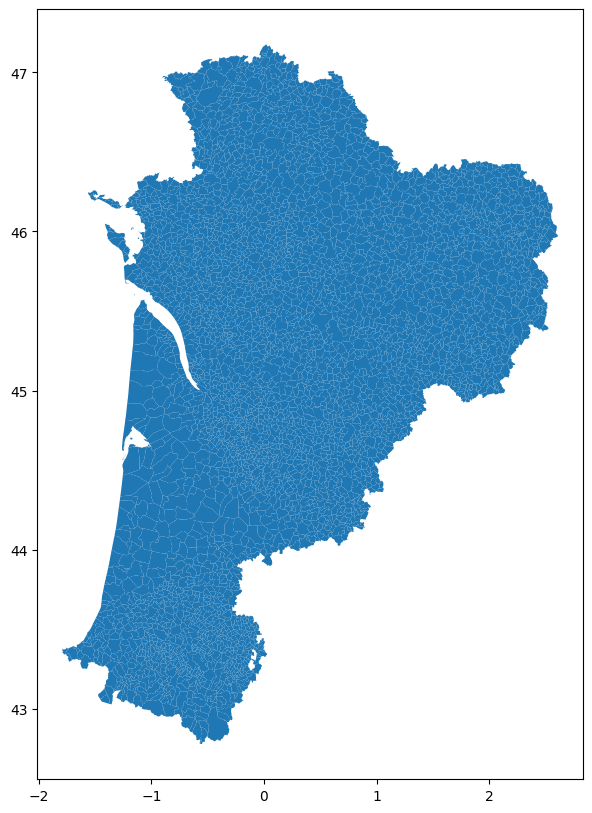

In [15]:
# Look only at the map as background layer
#communes_geom = zones
ax = communes_geom.plot(figsize=(10, 10))
ax

In [16]:
#https://colorbrewer2.org/#type=diverging&scheme=Spectral&n=6https://colorbrewer2.org/#type=diverging&scheme=Spectral&n=6
colormap = branca.colormap.StepColormap(
    vmin=test["petranger"].quantile(0.0),
    vmax=test["petranger"].quantile(1),
    colors=['#4a1486', '#1d91c0','#7fcdbb','#fee08b','#fc8d59', '#d53e4f', '#b2182b'],
    index=[ test["petranger"].quantile(0.10),test["petranger"].quantile(0.30), test["petranger"].quantile(0.50), test["petranger"].quantile(0.70), test["petranger"].quantile(0.90), test["petranger"].quantile(0.95)],
    caption="Part d'étrangers (%)"
)



### Prepare the data (if required ONLY ! )

In [17]:
## A faire  ssi les colonnes annee_dt, color, opacity n'existent pas dans communes_ts: ajoute des colonnes à communes_ts
communes_ts['annee_dt'] = communes_ts['annee'].apply(lambda x: pd.to_datetime(str(x)+'-01-01', format='%Y-%m-%d'))
communes_ts['annee_dt'] = communes_ts['annee_dt'].astype("int64")
#Division entière par 1000 avec // 1000 : .astype(int) / 10**9
communes_ts['annee_dt'] = communes_ts['annee_dt'] // 10 ** 9
communes_ts['annee_dt'] = communes_ts['annee_dt'].astype("U10") 

# Most important : the color is using the colormap defined for whatever the years
communes_ts['color'] = communes_ts['petranger'].apply(colormap) 
communes_ts['opacity'] = 1

In [18]:
#Construire le dictionnaire de style dont les clés sont les codes insee des communes puis ensuite un couple (couleur, opacité) indexé par l'année, pour chaque entité

# Voir https://python-visualization.github.io/folium/latest/user_guide/plugins/timeslider_choropleth.html 
import numpy as np
import datetime
 
styledata = {}

for country in communes_ts.index:
    df = communes_ts.query("code=='{}'".format(country))
    df = df.set_index('annee_dt')
    styledata[country] = df[['color', 'opacity']]
#3min de temps de calcul  

styledict_communes = {
    str(country): data.to_dict(orient="index") for country, data in styledata.items()
}


### Use the slider

In [ ]:
#Using a slider

# Tuto : https://python-visualization.github.io/folium/latest/user_guide/plugins/timeslider_choropleth.html
# Voir aussi https://github.com/germaniuss/folium-timesliderchoropleth pour ajouter des tooltips
# https://gis.stackexchange.com/questions/442764/folium-timesliderchoropleth-with-tooltip 

import branca

style_tooltip_txt = """
            background-color: #F0EFEF;
            border: 2px solid black;
            border-radius: 3px;
            box-shadow: 3px;
        """
    
##Minimap
from folium.plugins import MiniMap

min_lon, max_lon = -2, +2
min_lat, max_lat = 43, 47

m = folium.Map(location=(45.00, 0.15605), zoom_start=8, tiles="cartodb positron", width=1000, height=1200, 
        min_lat=min_lat,
        max_lat=max_lat,
        min_lon=min_lon,
        max_lon=max_lon) #45.64844

## Titre : https://stackoverflow.com/questions/61928013/adding-a-title-or-text-to-a-folium-map
map_title = "Répartition communale de la population étrangère en Nouvelle-Aquitaine, sur un siècle [1926-2022]"
source_text = "Données : INSEE [producteur], <a href='https://www.unehistoireduconflitpolitique.fr/telecharger.html'>Cagé-Piketty</a> [diffuseur] <br>&copy IGN Admin Express - millesime 2022 <br> Réalisation UMR 7301 Migrinter, C. Plumejeaud, 05-06-2024"
title_html = f'<h4 style="position:absolute;z-index:100000;left:20vh;bottom:95vh;font:bold" >{map_title}</h4>'
source_html = f'<h5 style="position:absolute;z-index:100001;left:70vh;bottom:0vw" >{source_text}</h5>'
m.get_root().html.add_child(folium.Element(title_html))
m.get_root().html.add_child(folium.Element(source_html))

## add markers for chef-lieux 
group_1 = folium.FeatureGroup("chef-lieux").add_to(m)
popup_content = '<table><tr><td>Nom</td><td>{0}</td></tr><tr><td>Statut</td><td>{1}</td></tr><tr><td>Département</td><td>{2}</td></tr><tr><td>Population 2020</td><td>{3}</td></tr></table>'
for index, row in cheflieux.iterrows() :
    #position des markers  : [latitude, longitude]
    folium.Marker(
        location=[row.geometry.geoms[0].coords[0][1], row.geometry.geoms[0].coords[0][0]],
        tooltip=row.NOM_2,
        popup=popup_content.format(row.NOM_2, row.STATUT, row.INSEE_DEP, row.POPULATION),
        icon=folium.Icon(color="green"),
    ).add_to(group_1)
    
group_00 = folium.FeatureGroup("etrangers_animation").add_to(m)
## Les communes, année 1926 à 2018
from folium.plugins import TimeSliderChoropleth

TimeSliderChoropleth(
    communes_geom.to_json(),
    styledict=styledict_communes,
    #init_timestamp=-1,
).add_to(group_00)

group_01 = folium.FeatureGroup("Description des communes, 2022").add_to(m)
#colormap(x["properties"]["petranger"]) if x["properties"]["petranger"] is not None else
## Les communes, année 2022, en transparence
g = folium.GeoJson(
    test.query("annee==2022"),
    style_function=lambda x: {
        "fillColor":  "transparent", 
        "color": "black", 
        "fillOpacity": 1,
        "weight": 0.5,
        "opacity": 0.65
    },
    ## Bulles avec les infos numériques sur les communes
    tooltip=folium.GeoJsonTooltip(
        fields=["nom", "petranger"],
        aliases=["Commune:", "Estimation étrangers en 2022 (%):"],
        localize=True,
        sticky=False,
        labels=True,
        style=style_tooltip_txt,
    )
).add_to(group_01)

## Les terrains
group_2 = folium.FeatureGroup("terrains").add_to(m)
# Courtours bleu : #00FFFFFF, blanc  : FFFFFF
for _, r in terrains.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r["geometry"]).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "#00000000", "color": "#000000"})
    folium.Popup(r["zone_etude"]).add_to(geo_j)
    geo_j.add_to(group_2)

colormap.add_to(m)

MiniMap().add_to(m)
folium.LayerControl().add_to(m)

#4s



In [ ]:
# temps d'affichage 9 s  
m 

In [ ]:
print('Saving the temporal map file...')
m.save('ocarto_commune_petranger_animation_1926-2018.html') #10s

# Lire les données GPS des oiseaux et faire une animation temporelle 

In [92]:
import pandas as pd

df_gps = pd.read_csv("C:\Travail\Enseignement\Cours_M2_python\\2023\data\kap_hoegh_gls_complet.csv", sep=";", encoding='utf-8')
print(df_gps.shape)
gps = gpd.GeoDataFrame(
    df_gps, geometry=gpd.points_from_xy(df_gps.long, df_gps.lat), crs="EPSG:4326"
)


print(gps.columns)
print(gps.shape)
print(gps.id.unique())

(28833, 13)
Index(['id', 'sex', 'date', 'time', 'lat', 'long', 'week', 'clean_lat',
       'clean_long', 'smooth_lat', 'smooth_long', 'distance_to_colony',
       'shoreline_distance', 'geometry'],
      dtype='object')
(28833, 14)
[  148   149   151   154   157   158   159   162 17577 17582 17584 17585
 17586 17587 17589  3597  3600  3603  3604  3606  3607  3611  3613  3614
  3617  3620  3621  3626  3632  3635  3638  3639  3641  3642  3644  3646
  3647  3648  3649  3651  3653  3654  3656  3658  3660  3665  3666  3668
  3669  3671  3674  3675  3679  3680  3682  3683  3687  3688  3689  3690
  3698  3701]


In [3]:
#Combien d'oiseaux différents
print(len(gps.id.unique())) #62

62


### 1. vous avez besoin d'un axe temporel : une colonne timestamp

- https://realpython.com/python-datetime/ 
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
- https://www.delftstack.com/fr/howto/python-pandas/how-to-convert-dataframe-column-to-datetime-in-pandas/


In [93]:
gps['timestamp'] = gps.date+' '+gps.time
format_string = "%Y-%m-%d %H:%M:%S"
from datetime import datetime

gps.timestamp = gps.timestamp.apply(lambda x: datetime.strptime(x, format_string))


### 2. Convertir dans le format spécial temporel




In [5]:

gps['timestamp_dt'] = gps['timestamp'].astype("int64")
#Division entière par 1000 avec // 1000 : .astype(int) / 10**9
gps['timestamp_dt'] = gps['timestamp_dt'] // 10 ** 9
gps['timestamp_dt'] = gps['timestamp_dt'].astype("U10") 



### 3. Map with color each point

In [6]:
import bokeh.palettes as bp
paletteC=bp.turbo(len(gps.id.unique()))
#print(paletteC)
#print(gps.id.unique().min())
#print(gps.id.unique().max())
#print(gps.id.unique())
colormap = branca.colormap.StepColormap(
    vmin=gps.id.unique().min(),
    vmax=gps.id.unique().max(),
    colors=paletteC,
    index=gps.id.unique().sort(),
    caption="identifiant des oiseaux"
)
colormap

In [94]:
# Most important : the color is using the colormap defined for whatever the years
gps['color'] = gps['id'].sort_values().apply(colormap) 
gps['opacity'] = 1



In [8]:
#Test colormap
colormap(149)#30123bf
colormap(3639)#3f98feff
colormap(17589)#7a0402ff

'#7a0402ff'

In [9]:
#gps['id'].sort_values()
print(gps.query('id == 148').color.unique())
print(gps.query('id == 17589').color.unique())

['#30123bff']
['#7a0402ff']


In [10]:
#gps.reset_index(inplace=True)

gps.head()

,id,sex,date,time,lat,long,week,clean_lat,clean_long,smooth_lat,smooth_long,distance_to_colony,shoreline_distance,geometry,timestamp,timestamp_dt,color,opacity
0,148,M,2010-09-23,12:05:00,-73.88,-3.27,38.0,73.090,-3.27,73.0900,-4.375000,16129.980207,1.645996e+06,POINT (-3.27000 -73.88000),2010-09-23 12:05:00,1285243500,#30123bff,1
1,148,M,2010-09-26,12:01:00,-58.37,-2.53,38.0,77.065,-2.53,77.0650,-2.363333,14432.162098,1.758521e+06,POINT (-2.53000 -58.37000),2010-09-26 12:01:00,1285502460,#30123bff,1
2,148,M,2010-09-27,11:52:00,-55.31,-0.24,39.0,75.395,-0.24,75.3950,-0.240000,14115.732508,1.835859e+06,POINT (-0.24000 -55.31000),2010-09-27 11:52:00,1285588320,#30123bff,1
3,148,M,2010-09-28,00:04:00,-39.85,-3.28,39.0,75.395,-3.28,73.5925,-2.555000,12382.022805,1.751246e+06,POINT (-3.28000 -39.85000),2010-09-28 00:04:00,1285632240,#30123bff,1
4,148,M,2010-09-29,00:06:00,90.00,-3.87,39.0,77.695,-3.87,77.6950,-3.450000,2143.841137,1.660825e+06,POINT (-3.87000 90.00000),2010-09-29 00:06:00,1285718760,#30123bff,1


In [11]:
#for p in gps.id.unique():
#    print(p)

essai = gps.query("id==148")
print(essai.shape)

essai = essai.set_index('timestamp_dt')
essai[['color', 'opacity']]

(499, 18)


,color,opacity
timestamp_dt,,
1285243500,#30123bff,1
1285502460,#30123bff,1
1285588320,#30123bff,1
1285632240,#30123bff,1
1285718760,#30123bff,1
...,...,...
1304168100,#30123bff,1
1304211060,#30123bff,1
1304253480,#30123bff,1


### 4. Construire le dico de style



In [12]:
import numpy as np
import datetime
 
styledata = {}

for p in gps.id.unique():
    df = gps.query("id=={}".format(p))
    df = df.set_index('timestamp_dt')
    styledata[p] = df[['color', 'opacity']]
#0.2 s de temps de calcul  

In [ ]:
styledata

In [13]:
styledict_communes = {
    str(bird): data.to_dict(orient="index") for bird, data in styledata.items()
}

### 5. Préparer les fonds de carte

In [95]:
world = gpd.read_file("C:/Travail/Enseignement/Cours_M2_python/2023/data/ne_earth_physical_land/ne_110m_land.shp")


In [96]:
communes_geom = gps.set_index('id')
communes_geom.drop(['timestamp'], axis=1, inplace=True)
communes_geom.head()

,sex,date,time,lat,long,week,clean_lat,clean_long,smooth_lat,smooth_long,distance_to_colony,shoreline_distance,geometry,color,opacity
id,,,,,,,,,,,,,,,
148,M,2010-09-23,12:05:00,-73.88,-3.27,38.0,73.090,-3.27,73.0900,-4.375000,16129.980207,1.645996e+06,POINT (-3.27000 -73.88000),#30123bff,1
148,M,2010-09-26,12:01:00,-58.37,-2.53,38.0,77.065,-2.53,77.0650,-2.363333,14432.162098,1.758521e+06,POINT (-2.53000 -58.37000),#30123bff,1
148,M,2010-09-27,11:52:00,-55.31,-0.24,39.0,75.395,-0.24,75.3950,-0.240000,14115.732508,1.835859e+06,POINT (-0.24000 -55.31000),#30123bff,1
148,M,2010-09-28,00:04:00,-39.85,-3.28,39.0,75.395,-3.28,73.5925,-2.555000,12382.022805,1.751246e+06,POINT (-3.28000 -39.85000),#30123bff,1
148,M,2010-09-29,00:06:00,90.00,-3.87,39.0,77.695,-3.87,77.6950,-3.450000,2143.841137,1.660825e+06,POINT (-3.87000 90.00000),#30123bff,1


### 6. Dessiner la carte

In [ ]:
#Using a slider

# Tuto : https://python-visualization.github.io/folium/latest/user_guide/plugins/timeslider_choropleth.html
# Voir aussi https://github.com/germaniuss/folium-timesliderchoropleth pour ajouter des tooltips
# https://gis.stackexchange.com/questions/442764/folium-timesliderchoropleth-with-tooltip 

import branca

style_tooltip_txt = """
            background-color: #F0EFEF;
            border: 2px solid black;
            border-radius: 3px;
            box-shadow: 3px;
        """
    
##Minimap
from folium.plugins import MiniMap

min_lon, max_lon = gps.smooth_long.min(), gps.smooth_long.max()
min_lat, max_lat = gps.smooth_lat.min(), gps.smooth_lat.max()


m = folium.Map(location=(gps.smooth_lat.median(), gps.smooth_long.median()), zoom_start=3, tiles="cartodb positron", width=1000, height=1200, 
        min_lat=min_lat,
        max_lat=max_lat,
        min_lon=min_lon,
        max_lon=max_lon) 

## Titre : https://stackoverflow.com/questions/61928013/adding-a-title-or-text-to-a-folium-map
map_title = "Migration des oiseaux 2010-2011"
source_text = "Données : Arctox [producteur], <br>Fond Natural Earth<br> Réalisation C. Plumejeaud, 08-11-2024"
title_html = f'<h4 style="position:absolute;z-index:100000;left:20vh;bottom:95vh;font:bold" >{map_title}</h4>'
source_html = f'<h5 style="position:absolute;z-index:100001;left:70vh;bottom:0vw" >{source_text}</h5>'
m.get_root().html.add_child(folium.Element(title_html))
m.get_root().html.add_child(folium.Element(source_html))


## Le monde et les continents
group_2 = folium.FeatureGroup("land").add_to(m)
# Courtours bleu : #00FFFFFF, blanc  : FFFFFF
for _, r in world.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r["geometry"]).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "#00000000", "color": "#000000"})
    #folium.Popup(r["zone_etude"]).add_to(geo_j)
    geo_j.add_to(group_2)

    
## Les oiseaux
from folium.plugins import TimeSliderChoropleth
group_00 = folium.FeatureGroup("migration_animation").add_to(m)
TimeSliderChoropleth(
    communes_geom.to_json(),
    styledict=styledict_communes,
    #init_timestamp=-1,
).add_to(group_00)


colormap.add_to(m)

MiniMap().add_to(m)
folium.LayerControl().add_to(m)

#1.2s



### 7. Sauver la carte dans un fichier HTML

In [ ]:
print('Saving the temporal map file...')
m.save('animation_gps_oiseaux.html') #1.6s

In [97]:
del m

## La bonne approche : Timeline and TimelineSlider
https://python-visualization.github.io/folium/latest/user_guide/plugins/timeline.html 

In [98]:
gps.shape

(28833, 17)

In [99]:
# need a start and a end 
min_date = gps.timestamp.min()
gps['start'] = gps.timestamp
gps['end'] = gps.timestamp

calcul = []
for i in range(0, gps.shape[0]-1):
        #gps.iloc[i]['end'] = gps.iloc[i+1]['start']
        calcul.append(gps.iloc[i+1]['timestamp'])

#print(gps.iloc[gps.shape[0]-1])
#last one
calcul.append(gps.iloc[gps.shape[0]-1]['timestamp'])

print(len(calcul)) #28833
gps['end'] = calcul
        
gps[['timestamp', 'start', 'end']].tail()


28833


,timestamp,start,end
28828,2010-04-29 02:35:00,2010-04-29 02:35:00,2010-05-01 02:20:00
28829,2010-05-01 02:20:00,2010-05-01 02:20:00,2010-05-01 14:28:00
28830,2010-05-01 14:28:00,2010-05-01 14:28:00,2010-05-02 14:33:00
28831,2010-05-02 14:33:00,2010-05-02 14:33:00,2010-05-03 14:15:00
28832,2010-05-03 14:15:00,2010-05-03 14:15:00,2010-05-03 14:15:00


In [100]:
print(min_date)
gps[['timestamp', 'start', 'end']].head()


2009-08-22 01:14:00


,timestamp,start,end
0,2010-09-23 12:05:00,2010-09-23 12:05:00,2010-09-26 12:01:00
1,2010-09-26 12:01:00,2010-09-26 12:01:00,2010-09-27 11:52:00
2,2010-09-27 11:52:00,2010-09-27 11:52:00,2010-09-28 00:04:00
3,2010-09-28 00:04:00,2010-09-28 00:04:00,2010-09-29 00:06:00
4,2010-09-29 00:06:00,2010-09-29 00:06:00,2010-10-01 12:16:00


In [103]:
min_date.day

22

In [104]:
#gps_copy = gps.copy()
#del gps_copy
#
import datetime


gps[['timestamp', 'start', 'end']] = gps[['timestamp', 'start', 'end']].apply(lambda x: (x - datetime.datetime(min_date.year, min_date.month, min_date.day)).dt.total_seconds())

#gps[['timestamp', 'start', 'end']] = gps[['timestamp', 'start', 'end']].apply(lambda x: x.dt.total_seconds())


In [105]:
print(gps[['timestamp', 'start', 'end', 'color']].head())

#.set_index(['id'])
data = gps.query("id == 148").to_json()
data

    timestamp       start         end      color
0  34344300.0  34344300.0  34603260.0  #30123bff
1  34603260.0  34603260.0  34689120.0  #30123bff
2  34689120.0  34689120.0  34733040.0  #30123bff
3  34733040.0  34733040.0  34819560.0  #30123bff
4  34819560.0  34819560.0  35036160.0  #30123bff


'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"id": 148, "sex": "M", "date": "2010-09-23", "time": "12:05:00", "lat": -73.88, "long": -3.27, "week": 38.0, "clean_lat": 73.09, "clean_long": -3.27, "smooth_lat": 73.09, "smooth_long": -4.375, "distance_to_colony": 16129.9802069944, "shoreline_distance": 1645996.4084521402, "timestamp": 34344300.0, "color": "#30123bff", "opacity": 1, "start": 34344300.0, "end": 34603260.0}, "geometry": {"type": "Point", "coordinates": [-3.27, -73.88]}}, {"id": "1", "type": "Feature", "properties": {"id": 148, "sex": "M", "date": "2010-09-26", "time": "12:01:00", "lat": -58.37, "long": -2.53, "week": 38.0, "clean_lat": 77.065, "clean_long": -2.53, "smooth_lat": 77.065, "smooth_long": -2.36333333333333, "distance_to_colony": 14432.16209806161, "shoreline_distance": 1758520.9226653427, "timestamp": 34603260.0, "color": "#30123bff", "opacity": 1, "start": 34603260.0, "end": 34689120.0}, "geometry": {"type": "Point", 

In [106]:
gps[gps['id'].isin([148, 3639,17589])].to_json()


'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"id": 148, "sex": "M", "date": "2010-09-23", "time": "12:05:00", "lat": -73.88, "long": -3.27, "week": 38.0, "clean_lat": 73.09, "clean_long": -3.27, "smooth_lat": 73.09, "smooth_long": -4.375, "distance_to_colony": 16129.9802069944, "shoreline_distance": 1645996.4084521402, "timestamp": 34344300.0, "color": "#30123bff", "opacity": 1, "start": 34344300.0, "end": 34603260.0}, "geometry": {"type": "Point", "coordinates": [-3.27, -73.88]}}, {"id": "1", "type": "Feature", "properties": {"id": 148, "sex": "M", "date": "2010-09-26", "time": "12:01:00", "lat": -58.37, "long": -2.53, "week": 38.0, "clean_lat": 77.065, "clean_long": -2.53, "smooth_lat": 77.065, "smooth_long": -2.36333333333333, "distance_to_colony": 14432.16209806161, "shoreline_distance": 1758520.9226653427, "timestamp": 34603260.0, "color": "#30123bff", "opacity": 1, "start": 34603260.0, "end": 34689120.0}, "geometry": {"type": "Point", 

In [107]:
import folium
from folium.utilities import JsCode
from folium.features import GeoJsonPopup
from folium.plugins.timeline import Timeline, TimelineSlider
import requests

m = folium.Map()

#data = gps.query("id == 148 ").to_json()
data = gps[gps['id'].isin([148, 3639, 17589])].to_json()
'''data = requests.get(
    "https://raw.githubusercontent.com/python-visualization/folium-example-data/main/historical_country_borders.json"
).json()
'''
timeline = Timeline(
    data,
    style=JsCode("""
        function (data) {
            return {
                radius: 8,
                stroke: true,
                fillColor: data.properties.color, 
                weight: 1,
                opacity: 1,
                fillOpacity: 0.5,
            };
        }
    """)
).add_to(m)
GeoJsonPopup(fields=['id'], labels=True).add_to(timeline)
TimelineSlider(
    auto_play=False,
    show_ticks=True,
    enable_keyboard_controls=True,
    playback_duration=30000,
).add_timelines(timeline).add_to(m)



'\nvar geojsonMarkerOptions = {\n    radius: 8,\n    fillColor: "#ff7800",\n    color: "#000",\n    weight: 1,\n    opacity: 1,\n    fillOpacity: 0.8\n};\n\nL.geoJson(someGeojsonFeature, {\n    pointToLayer: function (feature, latlng) {\n        return L.circleMarker(latlng, geojsonMarkerOptions);\n    }\n}).addTo(map);'

In [108]:
m

- https://stackoverflow.com/questions/75330933/folium-heatmapwithtime-html-file-generated-is-blank